<a href="https://colab.research.google.com/github/here-is-written-a-serious-username/Python_lesson_Colaboratory/blob/hw_1/Python_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Київ")
data_json = response.json()

In [43]:
df = pd.DataFrame(data_json["data"])
df["at"] = pd.to_datetime(df["at"])
df=df.rename(columns = {"at": "Дата", "val":"Вакансії"})
df.set_index('Дата', inplace=True)

In [44]:
df.head()

,Вакансії
Дата,
2022-05-23,4831
2022-05-24,5118
2022-05-25,5025
2022-05-26,5134
2022-05-27,5233


In [46]:
df['Вакансії']= df['Вакансії'].replace(0, np.nan)
df['Вакансії']= df['Вакансії'].interpolate()
df['rolling_mean'] = df['Вакансії'].rolling(window=7).mean()

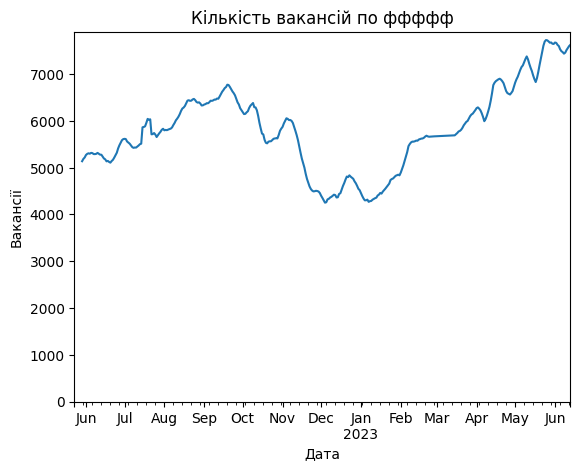

In [47]:
df['rolling_mean'].plot()
plt.title("Кількість вакансій по Києву")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()